初期値: x=4.00, y=4.00, f(x,y)=296.00
Step 100: x=3.0360, y=3.0387, Loss=148.4624
Step 200: x=2.1778, y=2.1917, Loss=68.4047
Step 300: x=1.4341, y=1.4685, Loss=28.6086
Step 400: x=0.8076, y=0.8717, Loss=10.5375
Step 500: x=0.2973, y=0.3984, Loss=2.9936
Step 600: x=-0.1028, y=0.0396, Loss=-0.0226
Step 700: x=-0.4037, y=-0.2193, Loss=-1.3013
Step 800: x=-0.6199, y=-0.3966, Loss=-1.9486
Step 900: x=-0.7680, y=-0.5115, Loss=-2.3381
Step 1000: x=-0.8647, y=-0.5820, Loss=-2.5866

最終到達点: x=-0.8647, y=-0.5820
理論上の最小値: x=-1.0, y=-0.6667


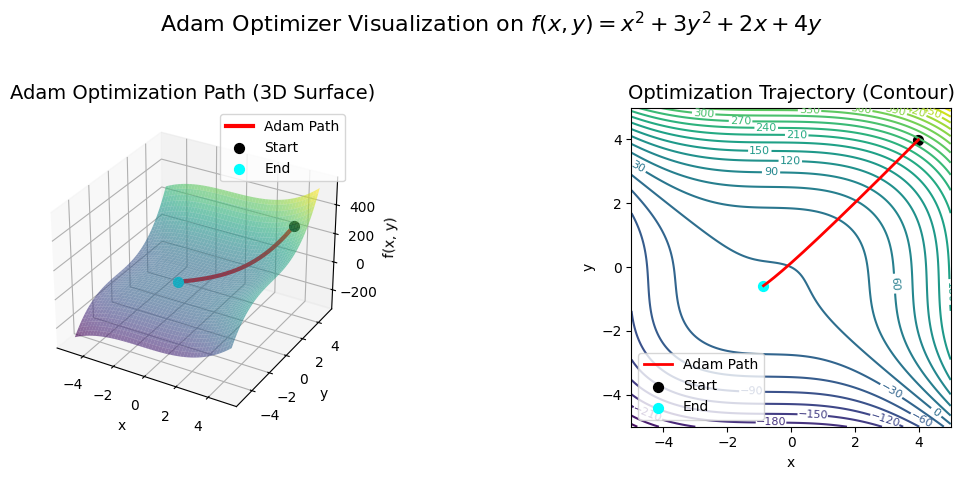

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# Adam オプティマイザ
# -------------------------------
class Adam:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps

        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grads):
        if self.m is None:
            # パラメータと同じ形状でモーメント(m)を初期化
            self.m = np.zeros_like(params)
        if self.v is None:
            # パラメータと同じ形状で二乗勾配のモーメント(v)を初期化
            self.v = np.zeros_like(params)

        self.t += 1

        # モーメントの更新
        # m: 勾配の指数移動平均（慣性項）
        self.m = self.beta1 * self.m + (1 - self.beta1) * grads
        # v: 勾配の二乗の指数移動平均（適応的学習率項）
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grads ** 2)

        # バイアス補正 (初期のバイアスを解消)
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        # パラメータ更新
        # Adamの更新式: params -= lr * m_hat / (sqrt(v_hat) + eps)
        params -= self.lr * m_hat / (np.sqrt(v_hat) + self.eps)
        return params

# -------------------------------
# 最適化したい関数（例：二次関数）
# -------------------------------
def f(x, y):
    """目的関数: f(x, y) = x^2 + 3y^2 + 2x + 4y"""
    # 最小値は f'(x)=0, f'(y)=0 より x = -1, y = -4/6 = -2/3
    return x**3 + 2*x**2 + 2*y**3 + 3*y**2 + 2*x + 4*y

# 勾配
def grad_f(x, y):
    """偏微分 (勾配) ベクトル"""
    df_dx = 2*x + 2
    df_dy = 6*y + 4
    return np.array([df_dx, df_dy])


# -------------------------------
# 最適化ループ
# -------------------------------
adam = Adam(lr=0.01)
# 修正箇所: ここにあったU+00A0（ノーブレークスペース）を通常のスペースに置き換えました
params = np.array([4.0, 4.0])  # 初期値 (x=4, y=4)

trajectory = []  # 軌跡保存

print(f"初期値: x={params[0]:.2f}, y={params[1]:.2f}, f(x,y)={f(params[0], params[1]):.2f}")

for step in range(1000):
    grads = grad_f(params[0], params[1])
    params = adam.update(params, grads)
    trajectory.append(params.copy())

    if (step + 1) % 100 == 0:
        loss = f(params[0], params[1])
        print(f"Step {step+1}: x={params[0]:.4f}, y={params[1]:.4f}, Loss={loss:.4f}")

trajectory = np.array(trajectory)

print(f"\n最終到達点: x={params[0]:.4f}, y={params[1]:.4f}")
print(f"理論上の最小値: x=-1.0, y=-0.6667")

# -------------------------------
# ３Ｄ可視化
# -------------------------------
fig = plt.figure(figsize=(12, 5))

# ======= 3D Surface Plot ======
ax = fig.add_subplot(1, 2, 1, projection='3d')

# 曲面の定義
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# 曲面の描画 (透明度を設定)
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# 軌跡の描画 (Z軸の高さは、軌跡上のf(x,y)の値)
Z_traj = f(trajectory[:, 0], trajectory[:, 1])
ax.plot(trajectory[:, 0], trajectory[:, 1], Z_traj, color='red', linewidth=3, label='Adam Path')
ax.scatter(trajectory[0, 0], trajectory[0, 1], Z_traj[0], color='black', s=50, label='Start')
ax.scatter(trajectory[-1, 0], trajectory[-1, 1], Z_traj[-1], color='cyan', s=50, label='End')

ax.set_title("Adam Optimization Path (3D Surface)", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()


# ======= Contour Plot ======
ax2 = fig.add_subplot(1, 2, 2)

# 等高線の描画
contour = ax2.contour(X, Y, Z, levels=30, cmap='viridis')
ax2.clabel(contour, inline=1, fontsize=8) # ラベル表示

# 軌跡の描画
ax2.plot(trajectory[:, 0], trajectory[:, 1], color='red', linewidth=2, label='Adam Path')
ax2.scatter(trajectory[0, 0], trajectory[0, 1], color='black', s=50, label='Start')
ax2.scatter(trajectory[-1, 0], trajectory[-1, 1], color='cyan', s=50, label='End')

ax2.set_title("Optimization Trajectory (Contour)", fontsize=14)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend()
ax2.set_aspect('equal', adjustable='box') # 縦横比を等しくして歪みを防ぐ

plt.suptitle("Adam Optimizer Visualization on $f(x, y) = x^2 + 3y^2 + 2x + 4y$", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # タイトル分のスペースを確保
plt.show()

Adam 最終損失: -2.5866 (最終点: x=-0.8647, y=-0.5820)
SGD 最終損失: -2.7298 (最終点: x=-0.7619, y=-0.6662)
理論上の最小値: x=-1.0, y=-0.6667


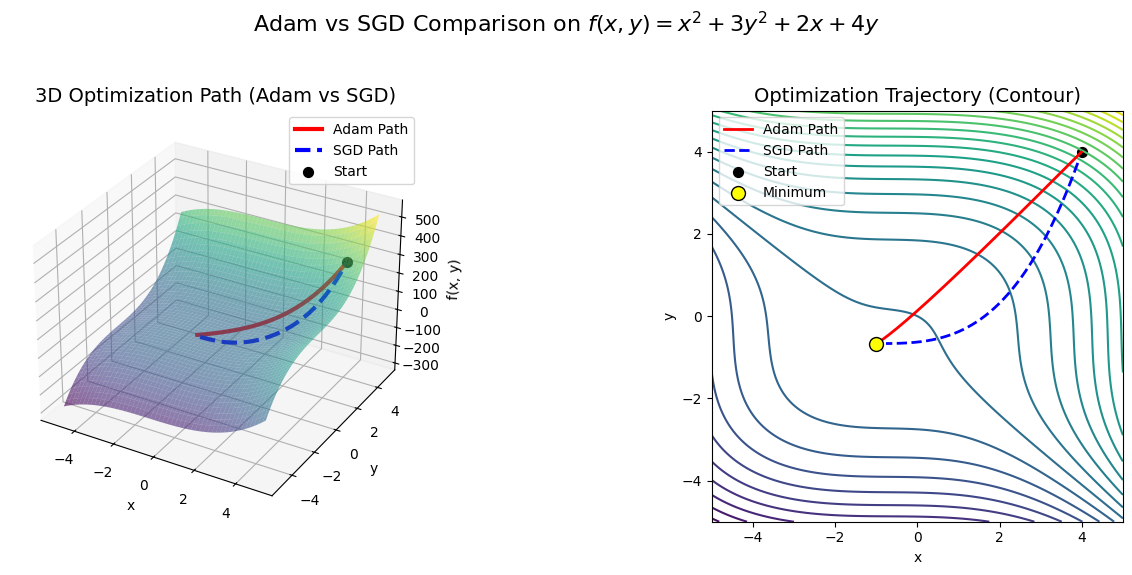

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# 1. Adam オプティマイザ
# -------------------------------
class Adam:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grads):
        if self.m is None:
            self.m = np.zeros_like(params)
        if self.v is None:
            self.v = np.zeros_like(params)
        self.t += 1

        # モーメント更新とバイアス補正
        self.m = self.beta1 * self.m + (1 - self.beta1) * grads
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grads ** 2)
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        # パラメータ更新
        params -= self.lr * m_hat / (np.sqrt(v_hat) + self.eps)
        return params

# -------------------------------
# 2. SGD オプティマイザ (学習率スケジュール付き)
# -------------------------------
class SGD:
    """確率的勾配降下法 (Stochastic Gradient Descent)"""
    def __init__(self, learning_rate=0.01, t0=5, t1=50, use_schedule=False):
        self.lr = learning_rate
        self.t0 = t0
        self.t1 = t1
        self.use_schedule = use_schedule
        self.t = 0  # イテレーション回数をカウントするカウンター

    def _learning_schedule(self):
        """イテレーションtに応じた学習率を返すプライベートメソッド"""
        # tが1から始まるため、t+t1を使用
        return self.t0 / (self.t + self.t1)

    def update(self, params, grads):
        self.t += 1 # イテレーション回数をインクリメント

        current_lr = self.lr

        # 学習スケジュールを使用する場合、学習率を更新
        if self.use_schedule:
             current_lr = self._learning_schedule()

        # SGDの更新式: パラメータ = パラメータ - 現在の学習率 * 勾配
        params -= current_lr * grads
        return params

# -------------------------------
# 3. 最適化したい関数（二次関数）と勾配
# -------------------------------
def f(x, y):
    """目的関数: f(x, y) = x^2 + 3y^2 + 2x + 4y"""
    return x**3 + 2*x**2 + 2*y**3 + 3*y**2 + 2*x + 4*y

def grad_f(x, y):
    """偏微分 (勾配) ベクトル"""
    df_dx = 2*x + 2
    df_dy = 6*y + 4
    return np.array([df_dx, df_dy])


# -------------------------------
# 4. 最適化ループ実行関数
# -------------------------------
def run_optimization(optimizer, steps=1000, initial_params=np.array([4.0, 4.0])):
    """指定されたオプティマイザで最適化を実行し、軌跡を返す"""
    params = initial_params.copy()
    trajectory = []

    for _ in range(steps):
        grads = grad_f(params[0], params[1])
        params = optimizer.update(params, grads)
        trajectory.append(params.copy())

    final_loss = f(params[0], params[1])
    return np.array(trajectory), final_loss

# -------------------------------
# 5. 訓練の実行と比較
# -------------------------------
STEPS = 1000
INITIAL_PARAMS = np.array([4.0, 4.0])

# Adam の実行
adam_optimizer = Adam(lr=0.01)
adam_trajectory, adam_loss = run_optimization(adam_optimizer, STEPS, INITIAL_PARAMS)
print(f"Adam 最終損失: {adam_loss:.4f} (最終点: x={adam_trajectory[-1, 0]:.4f}, y={adam_trajectory[-1, 1]:.4f})")

# SGD の実行 (学習率スケジュールを使用)
# Adamと公平に比較するため、SGDの初期学習率も0.01付近になるように設定
# SGDはAdamほど強力ではないため、収束に時間がかかる
sgd_optimizer = SGD(learning_rate=0.01, t0=0.5, t1=50, use_schedule=True)
sgd_trajectory, sgd_loss = run_optimization(sgd_optimizer, STEPS, INITIAL_PARAMS)
print(f"SGD 最終損失: {sgd_loss:.4f} (最終点: x={sgd_trajectory[-1, 0]:.4f}, y={sgd_trajectory[-1, 1]:.4f})")
print(f"理論上の最小値: x=-1.0, y=-0.6667")


# -------------------------------
# 6. 可視化
# -------------------------------
fig = plt.figure(figsize=(14, 6))

# 曲面の定義
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# ======= 3D Surface Plot ======
ax = fig.add_subplot(1, 2, 1, projection='3d')

# 曲面の描画
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# 軌跡の描画 (Adam)
Z_adam_traj = f(adam_trajectory[:, 0], adam_trajectory[:, 1])
ax.plot(adam_trajectory[:, 0], adam_trajectory[:, 1], Z_adam_traj, color='red', linewidth=3, label='Adam Path')

# 軌跡の描画 (SGD)
Z_sgd_traj = f(sgd_trajectory[:, 0], sgd_trajectory[:, 1])
ax.plot(sgd_trajectory[:, 0], sgd_trajectory[:, 1], Z_sgd_traj, color='blue', linewidth=3, linestyle='--', label='SGD Path')

ax.scatter(INITIAL_PARAMS[0], INITIAL_PARAMS[1], f(INITIAL_PARAMS[0], INITIAL_PARAMS[1]), color='black', s=50, label='Start')

ax.set_title("3D Optimization Path (Adam vs SGD)", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()


# ======= Contour Plot ======
ax2 = fig.add_subplot(1, 2, 2)

# 等高線の描画
ax2.contour(X, Y, Z, levels=30, cmap='viridis')

# 軌跡の描画
ax2.plot(adam_trajectory[:, 0], adam_trajectory[:, 1], color='red', linewidth=2, label='Adam Path')
ax2.plot(sgd_trajectory[:, 0], sgd_trajectory[:, 1], color='blue', linewidth=2, linestyle='--', label='SGD Path')
ax2.scatter(INITIAL_PARAMS[0], INITIAL_PARAMS[1], color='black', s=50, label='Start')
ax2.scatter(-1.0, -4/6, color='yellow', edgecolor='black', s=100, label='Minimum', zorder=5) # 最小値

ax2.set_title("Optimization Trajectory (Contour)", fontsize=14)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend()
ax2.set_aspect('equal', adjustable='box')

plt.suptitle("Adam vs SGD Comparison on $f(x, y) = x^2 + 3y^2 + 2x + 4y$", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Adam 最終損失: -2.2935 (最終点: x=-0.8647, y=-0.5820)
SGD 最終損失: -2.2766 (最終点: x=-0.7619, y=-0.6662)
RMSprop 最終損失: -2.3333 (最終点: x=-1.0000, y=-0.6667)
理論上の最小値: x=-1.0, y=-0.6667


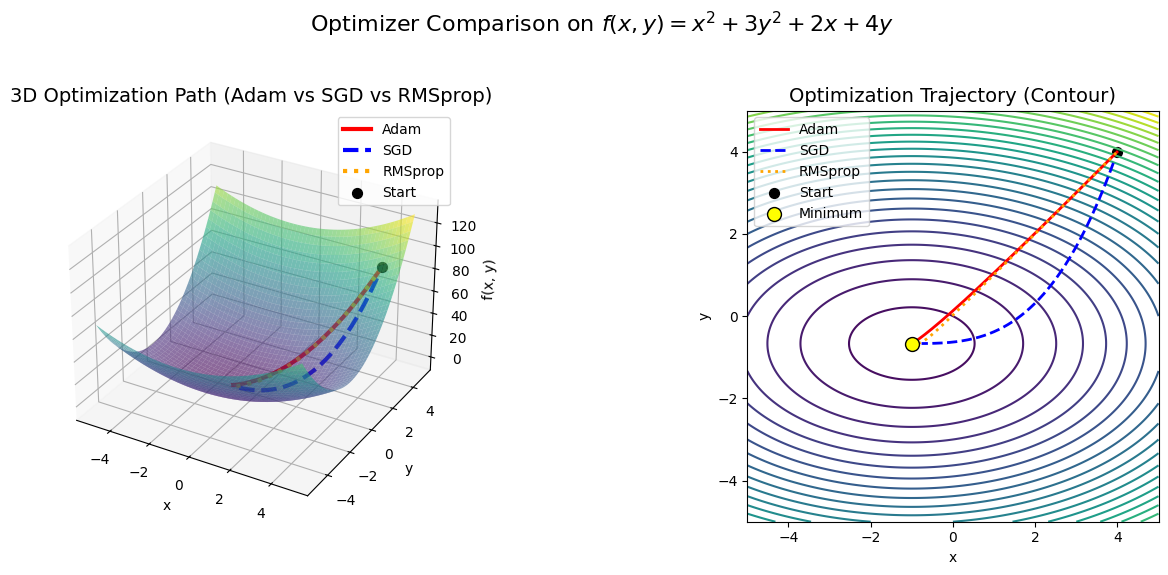

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# 1. オプティマイザクラス群
# -------------------------------

class Adam:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grads):
        if self.m is None: self.m = np.zeros_like(params)
        if self.v is None: self.v = np.zeros_like(params)
        self.t += 1

        self.m = self.beta1 * self.m + (1 - self.beta1) * grads
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grads ** 2)
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        params -= self.lr * m_hat / (np.sqrt(v_hat) + self.eps)
        return params

class SGD:
    def __init__(self, learning_rate=0.01, t0=5, t1=50, use_schedule=False):
        self.lr = learning_rate
        self.t0 = t0
        self.t1 = t1
        self.use_schedule = use_schedule
        self.t = 0

    def _learning_schedule(self):
        return self.t0 / (self.t + self.t1)

    def update(self, params, grads):
        self.t += 1
        current_lr = self.lr

        if self.use_schedule:
             current_lr = self._learning_schedule()

        params -= current_lr * grads
        return params

class RMSprop:
    """Root Mean Square Propagation (RMSprop)"""
    def __init__(self, lr=0.01, rho=0.9, eps=1e-8):
        """
        :param lr: 学習率 (alpha)
        :param rho: 減衰率 (beta2に相当, 勾配二乗の移動平均に使用)
        :param eps: 微小値
        """
        self.lr = lr
        self.rho = rho
        self.eps = eps
        self.v = None # 二乗勾配の指数移動平均

    def update(self, params, grads):
        if self.v is None:
            self.v = np.zeros_like(params)

        # 勾配の二乗の指数移動平均を計算 (Adamのvの更新式と類似)
        self.v = self.rho * self.v + (1 - self.rho) * (grads ** 2)

        # RMSpropの更新式
        # params -= lr * grads / (sqrt(v) + eps)
        params -= self.lr * grads / (np.sqrt(self.v) + self.eps)
        return params


# -------------------------------
# 2. 最適化したい関数（二次関数）と勾配
# -------------------------------
def f(x, y):
    """目的関数: f(x, y) = x^2 + 3y^2 + 2x + 4y"""
    return x**2 + 3*y**2 + 2*x + 4*y

def grad_f(x, y):
    """偏微分 (勾配) ベクトル"""
    df_dx = 2*x + 2
    df_dy = 6*y + 4
    return np.array([df_dx, df_dy])


# -------------------------------
# 3. 最適化ループ実行関数
# -------------------------------
def run_optimization(optimizer, steps=1000, initial_params=np.array([4.0, 4.0])):
    """指定されたオプティマイザで最適化を実行し、軌跡を返す"""
    params = initial_params.copy()
    trajectory = []

    for _ in range(steps):
        grads = grad_f(params[0], params[1])
        params = optimizer.update(params, grads)
        trajectory.append(params.copy())

    final_loss = f(params[0], params[1])
    return np.array(trajectory), final_loss

# -------------------------------
# 4. 訓練の実行と比較
# -------------------------------
STEPS = 1000
INITIAL_PARAMS = np.array([4.0, 4.0])

# Adam の実行
adam_optimizer = Adam(lr=0.01)
adam_trajectory, adam_loss = run_optimization(adam_optimizer, STEPS, INITIAL_PARAMS)
print(f"Adam 最終損失: {adam_loss:.4f} (最終点: x={adam_trajectory[-1, 0]:.4f}, y={adam_trajectory[-1, 1]:.4f})")

# SGD の実行 (学習率スケジュールを使用)
sgd_optimizer = SGD(learning_rate=0.01, t0=0.5, t1=50, use_schedule=True)
sgd_trajectory, sgd_loss = run_optimization(sgd_optimizer, STEPS, INITIAL_PARAMS)
print(f"SGD 最終損失: {sgd_loss:.4f} (最終点: x={sgd_trajectory[-1, 0]:.4f}, y={sgd_trajectory[-1, 1]:.4f})")

# RMSprop の実行
rmsprop_optimizer = RMSprop(lr=0.01, rho=0.9)
rmsprop_trajectory, rmsprop_loss = run_optimization(rmsprop_optimizer, STEPS, INITIAL_PARAMS)
print(f"RMSprop 最終損失: {rmsprop_loss:.4f} (最終点: x={rmsprop_trajectory[-1, 0]:.4f}, y={rmsprop_trajectory[-1, 1]:.4f})")
print(f"理論上の最小値: x=-1.0, y=-0.6667")


# -------------------------------
# 5. 可視化
# -------------------------------
fig = plt.figure(figsize=(14, 6))

# 曲面の定義
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# ======= 3D Surface Plot ======
ax = fig.add_subplot(1, 2, 1, projection='3d')

# 曲面の描画
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# 軌跡の描画
Z_adam_traj = f(adam_trajectory[:, 0], adam_trajectory[:, 1])
ax.plot(adam_trajectory[:, 0], adam_trajectory[:, 1], Z_adam_traj, color='red', linewidth=3, label='Adam')
Z_sgd_traj = f(sgd_trajectory[:, 0], sgd_trajectory[:, 1])
ax.plot(sgd_trajectory[:, 0], sgd_trajectory[:, 1], Z_sgd_traj, color='blue', linewidth=3, linestyle='--', label='SGD')
Z_rmsprop_traj = f(rmsprop_trajectory[:, 0], rmsprop_trajectory[:, 1])
ax.plot(rmsprop_trajectory[:, 0], rmsprop_trajectory[:, 1], Z_rmsprop_traj, color='orange', linewidth=3, linestyle=':', label='RMSprop')

ax.scatter(INITIAL_PARAMS[0], INITIAL_PARAMS[1], f(INITIAL_PARAMS[0], INITIAL_PARAMS[1]), color='black', s=50, label='Start')

ax.set_title("3D Optimization Path (Adam vs SGD vs RMSprop)", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()


# ======= Contour Plot ======
ax2 = fig.add_subplot(1, 2, 2)

# 等高線の描画
ax2.contour(X, Y, Z, levels=30, cmap='viridis')

# 軌跡の描画
ax2.plot(adam_trajectory[:, 0], adam_trajectory[:, 1], color='red', linewidth=2, label='Adam')
ax2.plot(sgd_trajectory[:, 0], sgd_trajectory[:, 1], color='blue', linewidth=2, linestyle='--', label='SGD')
ax2.plot(rmsprop_trajectory[:, 0], rmsprop_trajectory[:, 1], color='orange', linewidth=2, linestyle=':', label='RMSprop')
ax2.scatter(INITIAL_PARAMS[0], INITIAL_PARAMS[1], color='black', s=50, label='Start')
ax2.scatter(-1.0, -4/6, color='yellow', edgecolor='black', s=100, label='Minimum', zorder=5)

ax2.set_title("Optimization Trajectory (Contour)", fontsize=14)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend()
ax2.set_aspect('equal', adjustable='box')

plt.suptitle("Optimizer Comparison on $f(x, y) = x^2 + 3y^2 + 2x + 4y$", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

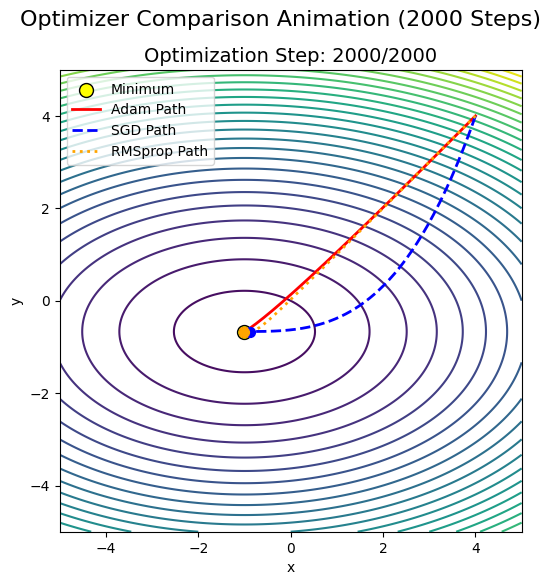

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# 1. オプティマイザクラス群 (変更なし)
# -------------------------------

class Adam:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grads):
        if self.m is None: self.m = np.zeros_like(params)
        if self.v is None: self.v = np.zeros_like(params)
        self.t += 1

        self.m = self.beta1 * self.m + (1 - self.beta1) * grads
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grads ** 2)
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        params -= self.lr * m_hat / (np.sqrt(v_hat) + self.eps)
        return params

class SGD:
    def __init__(self, lr=0.01, t0=0.5, t1=50, use_schedule=True):
        self.lr = lr
        self.t0 = t0
        self.t1 = t1
        self.use_schedule = use_schedule
        self.t = 0

    def _learning_schedule(self):
        return self.t0 / (self.t + self.t1)

    def update(self, params, grads):
        self.t += 1
        current_lr = self.lr

        if self.use_schedule:
             current_lr = self._learning_schedule()

        params -= current_lr * grads
        return params

class RMSprop:
    def __init__(self, lr=0.01, rho=0.9, eps=1e-8):
        self.lr = lr
        self.rho = rho
        self.eps = eps
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = np.zeros_like(params)

        self.v = self.rho * self.v + (1 - self.rho) * (grads ** 2)
        params -= self.lr * grads / (np.sqrt(self.v) + self.eps)
        return params


# -------------------------------
# 2. 目的関数と勾配 (変更なし)
# -------------------------------
def f(x, y):
    """目的関数: f(x, y) = x^2 + 3y^2 + 2x + 4y"""
    return x**2 + 3*y**2 + 2*x + 4*y

def grad_f(x, y):
    """偏微分 (勾配) ベクトル"""
    df_dx = 2*x + 2
    df_dy = 6*y + 4
    return np.array([df_dx, df_dy])


# -------------------------------
# 3. 軌跡データの生成
# -------------------------------
STEPS = 2000
INITIAL_PARAMS = np.array([4.0, 4.0])

def generate_trajectory(optimizer_class, **kwargs):
    """指定されたオプティマイザで最適化を実行し、軌跡を返す"""
    optimizer = optimizer_class(**kwargs)
    params = INITIAL_PARAMS.copy()
    trajectory = [params.copy()]

    for _ in range(STEPS):
        grads = grad_f(params[0], params[1])
        params = optimizer.update(params, grads)
        trajectory.append(params.copy())

    return np.array(trajectory)

# 各オプティマイザの軌跡を生成
adam_trajectory = generate_trajectory(Adam, lr=0.01)
sgd_trajectory = generate_trajectory(SGD, lr=0.01) # SGDはスケジューリングを使用
rmsprop_trajectory = generate_trajectory(RMSprop, lr=0.01)

trajectories = {
    'Adam': (adam_trajectory, 'red', '-'),
    'SGD': (sgd_trajectory, 'blue', '--'),
    'RMSprop': (rmsprop_trajectory, 'orange', ':')
}

# -------------------------------
# 4. アニメーション設定と描画
# -------------------------------
fig, ax2 = plt.subplots(figsize=(8, 6))

# 曲面データ（コンタープロット用）
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# 等高線（背景）の描画
ax2.contour(X, Y, Z, levels=30, cmap='viridis')
ax2.scatter(-1.0, -4/6, color='yellow', edgecolor='black', s=100, label='Minimum', zorder=5) # 最小値
ax2.set_title("Optimization Trajectory Animation (Contour)", fontsize=14)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_aspect('equal', adjustable='box')


# 各オプティマイザの軌跡と現在の位置を初期化
lines = {}
points = {}
for name, (_, color, linestyle) in trajectories.items():
    # 軌跡の線 (最初は空)
    line, = ax2.plot([], [], color=color, linewidth=2, linestyle=linestyle, label=f'{name} Path')
    lines[name] = line
    # 現在の位置を示す点
    point = ax2.scatter([], [], color=color, s=50, zorder=10)
    points[name] = point

ax2.legend()
plt.suptitle(f"Optimizer Comparison Animation ({STEPS} Steps)", fontsize=16)

# 初期化関数
def init():
    for name, line in lines.items():
        line.set_data([], [])
    for name, point in points.items():
        point.set_offsets(np.empty((0, 2)))
    return list(lines.values()) + list(points.values())

# アニメーション更新関数
def update(frame):
    if frame == 0:
        return init()

    for name, (traj, _, _) in trajectories.items():
        # 軌跡を順次追加
        x_data = traj[:frame+1, 0]
        y_data = traj[:frame+1, 1]
        lines[name].set_data(x_data, y_data)

        # 現在の位置を更新
        points[name].set_offsets([traj[frame, 0], traj[frame, 1]])

    ax2.set_title(f"Optimization Step: {frame}/{STEPS}", fontsize=14)
    return list(lines.values()) + list(points.values())

# アニメーション生成
# interval: フレーム間のミリ秒
# frames: フレーム数 (生成した軌跡のステップ数)
ani = FuncAnimation(
    fig,
    update,
    frames=len(adam_trajectory),
    init_func=init,
    interval=10,
    blit=True,
    repeat=False
)

# 動画を保存する場合 (ffmpegが必要)
ani.save('optimizer_animation.gif', writer='ffmpeg', fps=10)

plt.show()

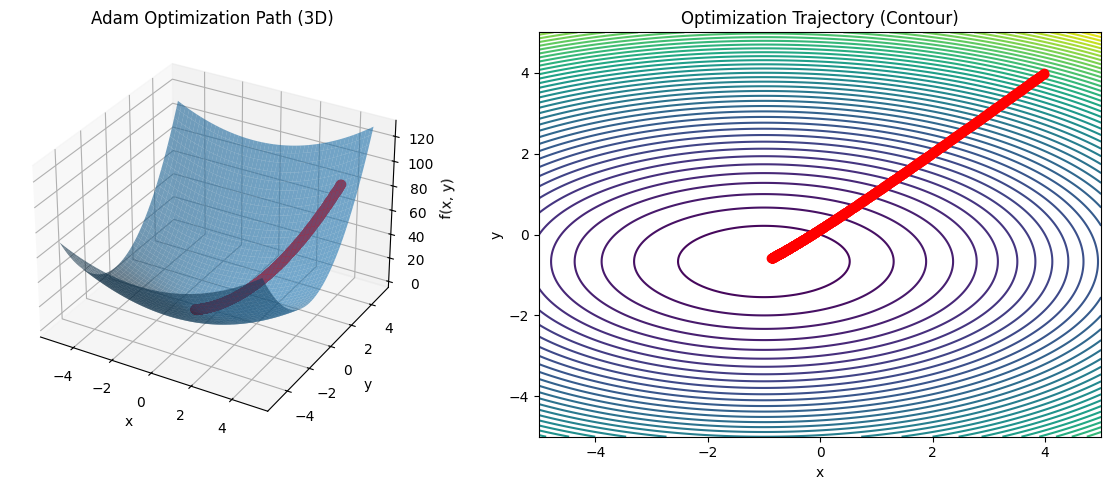

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# Adam オプティマイザ（あなたのコード）
# -------------------------------
class Adam:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps

        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grads):
        if self.m is None:
            self.m = np.zeros_like(params)
        if self.v is None:
            self.v = np.zeros_like(params)

        self.t += 1

        # モーメント
        self.m = self.beta1 * self.m + (1 - self.beta1) * grads
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grads ** 2)

        # バイアス補正
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        params -= self.lr * m_hat / (np.sqrt(v_hat) + self.eps)
        return params

# -------------------------------
# 最適化したい関数（例：二次関数）
# -------------------------------
def f(x, y):
    return x**2 + 3*y**2 + 2*x + 4*y

# 勾配
def grad_f(x, y):
    df_dx = 2*x + 2
    df_dy = 6*y + 4
    return np.array([df_dx, df_dy])


# -------------------------------
# 最適化ループ
# -------------------------------
adam = Adam(lr=0.01)
params = np.array([4.0, 4.0])  # 初期値

trajectory = []  # 軌跡保存

for _ in range(1000):
    grads = grad_f(params[0], params[1])
    params = adam.update(params, grads)
    trajectory.append(params.copy())

trajectory = np.array(trajectory)

# -------------------------------
# ３Ｄ可視化
# -------------------------------
fig = plt.figure(figsize=(12, 5))

# ======= 3D Surface Plot ======
ax = fig.add_subplot(1, 2, 1, projection='3d')

X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

ax.plot_surface(X, Y, Z, alpha=0.6)

# 軌跡を上から描画
Z_traj = f(trajectory[:, 0], trajectory[:, 1])
ax.plot(trajectory[:, 0], trajectory[:, 1], Z_traj, color='red', linewidth=2, marker='o')

ax.set_title("Adam Optimization Path (3D)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")


# ======= Contour Plot ======
ax2 = fig.add_subplot(1, 2, 2)

contour = ax2.contour(X, Y, Z, levels=50)
ax2.plot(trajectory[:, 0], trajectory[:, 1], color='red', marker='o')
ax2.set_title("Optimization Trajectory (Contour)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 最適化対象の関数
def f(x, y):
    """
    f(x, y) = x^2 + 3*y^2 + 2*x + 4*y
    """
    return x**2 + 3*y**2 + 2*x + 4*y

# 2. 勾配 (偏微分) を計算する関数
def gradient_f(x, y):
    """
    偏微分: df/dx = 2x + 2, df/dy = 6y + 4
    """
    df_dx = 2 * x + 2
    df_dy = 6 * y + 4
    return np.array([df_dx, df_dy])

# --- SGDの実装 ---
def stochastic_gradient_descent(start_point, learning_rate, epochs):
    # パラメータの初期値 (x, y)
    params = np.array(start_point, dtype=float)

    # 経路を記録するためのリスト
    history = [params.copy()]

    for epoch in range(epochs):
        # 1. 勾配を計算
        grad = gradient_f(params[0], params[1])

        # 2. パラメータを更新 (SGDの核となる部分)
        # θ_new = θ_old - η * ∇f
        params -= learning_rate * grad

        # 3. 経路を記録
        history.append(params.copy())

        # 収束条件 (勾配が非常に小さくなったら停止)
        if np.linalg.norm(grad) < 1e-4:
            print(f"Converged at epoch {epoch+1}")
            break

    return np.array(history)

# --- 実行 ---
start_point = [5.0, 3.0] # 開始点 (x=5, y=3)
learning_rate = 0.1      # 学習率 (歩幅)
epochs = 50              # 繰り返し回数

history = stochastic_gradient_descent(start_point, learning_rate, epochs)

# 結果表示
final_x, final_y = history[-1]
final_loss = f(final_x, final_y)
print("\n--- 最適化結果 ---")
print(f"初期値: x={start_point[0]:.4f}, y={start_point[1]:.4f}")
print(f"最終値: x={final_x:.4f}, y={final_y:.4f}")
print(f"最終損失: f(x, y)={final_loss:.4f}")

# 理論的な最小値の確認
# 2x + 2 = 0  => x = -1
# 6y + 4 = 0  => y = -4/6 ≈ -0.6667
# 最小損失: f(-1, -4/6) = -1 - 4/3 ≈ -2.3333


--- 最適化結果 ---
初期値: x=5.0000, y=3.0000
最終値: x=-0.9999, y=-0.6667
最終損失: f(x, y)=-2.3333


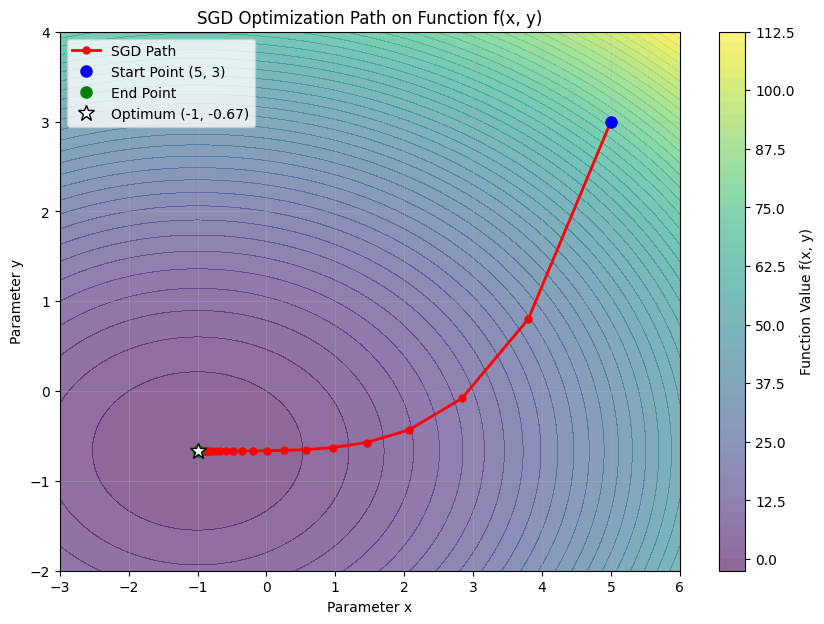

In [3]:
# --- 可視化 ---
# x, y の範囲を定義
x_range = np.linspace(-3, 6, 100)
y_range = np.linspace(-2, 4, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

plt.figure(figsize=(10, 7))

# 損失関数の等高線
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.6)
plt.colorbar(contour, label='Function Value f(x, y)')

# 最適化の経路をプロット
plt.plot(history[:, 0], history[:, 1], 'r-o', markersize=5, linewidth=2, label='SGD Path')

# 開始点と終了点
plt.plot(history[0, 0], history[0, 1], 'bo', markersize=8, label='Start Point (5, 3)')
plt.plot(history[-1, 0], history[-1, 1], 'go', markersize=8, label='End Point')

# 理論的な最小値 (最適解)
optimal_x = -1
optimal_y = -4/6
plt.plot(optimal_x, optimal_y, 'w*', markersize=12, markeredgecolor='black', label='Optimum (-1, -0.67)')

plt.title('SGD Optimization Path on Function f(x, y)')
plt.xlabel('Parameter x')
plt.ylabel('Parameter y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 最適化対象の関数（SGDと同じ）
def f(x, y):
    return x**2 + 3*y**2 + 2*x + 4*y

# 2. 勾配 (偏微分) を計算する関数（SGDと同じ）
def gradient_f(x, y):
    df_dx = 2 * x + 2
    df_dy = 6 * y + 4
    return np.array([df_dx, df_dy])

# --- Adamの実装 ---
def adam_optimizer(start_point, learning_rate, epochs, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # パラメータの初期値 (x, y)
    params = np.array(start_point, dtype=float)

    # 1次モーメント(m)と2次モーメント(v)の初期化
    m = np.zeros_like(params)
    v = np.zeros_like(params)

    # 経路を記録するためのリスト
    history = [params.copy()]

    for t in range(1, epochs + 1):
        # 1. 勾配を計算
        grad = gradient_f(params[0], params[1])

        # 2. 1次モーメント (m) と 2次モーメント (v) の更新
        # m_t = beta1 * m_{t-1} + (1 - beta1) * g_t
        m = beta1 * m + (1 - beta1) * grad
        # v_t = beta2 * v_{t-1} + (1 - beta2) * g_t^2
        v = beta2 * v + (1 - beta2) * (grad**2)

        # 3. バイアス補正 (初期のmとvが0に偏る影響を打ち消す)
        # m_hat = m_t / (1 - beta1^t)
        m_hat = m / (1 - beta1**t)
        # v_hat = v_t / (1 - beta2^t)
        v_hat = v / (1 - beta2**t)

        # 4. パラメータの更新
        # θ_new = θ_old - η * m_hat / (sqrt(v_hat) + epsilon)
        params -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        # 5. 経路を記録
        history.append(params.copy())

        # 収束条件
        if np.linalg.norm(grad) < 1e-4:
            print(f"Converged at epoch {t}")
            break

    return np.array(history)

# --- 実行 ---
start_point = [5.0, 3.0] # 開始点 (SGDと同じ)
learning_rate = 0.1      # 学習率 (SGDと同じ)
epochs = 50              # 繰り返し回数

history_adam = adam_optimizer(start_point, learning_rate, epochs)

# 結果表示
final_x, final_y = history_adam[-1]
final_loss = f(final_x, final_y)
print("\n--- Adam最適化結果 ---")
print(f"初期値: x={start_point[0]:.4f}, y={start_point[1]:.4f}")
print(f"最終値: x={final_x:.4f}, y={final_y:.4f}")
print(f"最終損失: f(x, y)={final_loss:.4f}")


--- Adam最適化結果 ---
初期値: x=5.0000, y=3.0000
最終値: x=0.7038, y=-0.6103
最終損失: f(x, y)=0.5793


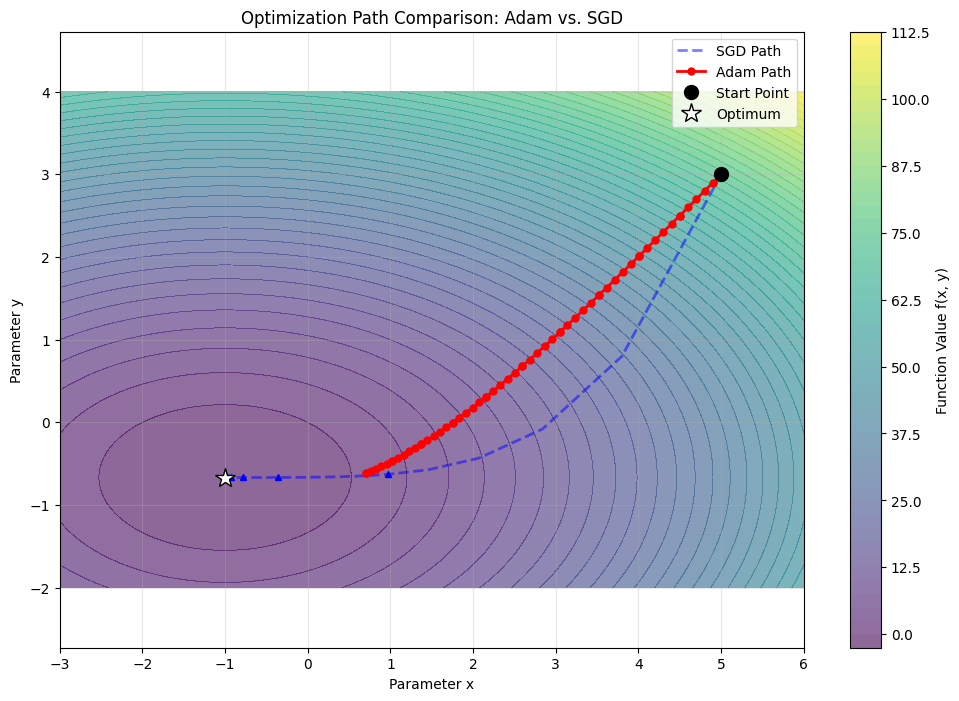

In [5]:
# --- SGDのHistoryを再計算（比較のため） ---
# ※ 前の質問で実行した history が必要です
def stochastic_gradient_descent(start_point, learning_rate, epochs):
    params = np.array(start_point, dtype=float)
    history = [params.copy()]
    for epoch in range(epochs):
        grad = gradient_f(params[0], params[1])
        params -= learning_rate * grad
        history.append(params.copy())
        if np.linalg.norm(grad) < 1e-4:
            break
    return np.array(history)
history_sgd = stochastic_gradient_descent(start_point, learning_rate, epochs)
# ----------------------------------------

# --- 可視化 ---
x_range = np.linspace(-3, 6, 100)
y_range = np.linspace(-2, 4, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

plt.figure(figsize=(12, 8))

# 損失関数の等高線
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.6)
plt.colorbar(contour, label='Function Value f(x, y)')

# 1. SGDの経路をプロット
plt.plot(history_sgd[:, 0], history_sgd[:, 1], 'b--', alpha=0.5, linewidth=2, label='SGD Path')
plt.plot(history_sgd[::5, 0], history_sgd[::5, 1], 'b^', markersize=5) # 5ステップごとのマーカー

# 2. Adamの経路をプロット
plt.plot(history_adam[:, 0], history_adam[:, 1], 'r-o', markersize=5, linewidth=2, label='Adam Path')
plt.plot(history_adam[::5, 0], history_adam[::5, 1], 'ro', markersize=5) # 5ステップごとのマーカー

# 開始点と理論的な最小値
plt.plot(history_adam[0, 0], history_adam[0, 1], 'ko', markersize=10, label='Start Point')
optimal_x = -1
optimal_y = -4/6
plt.plot(optimal_x, optimal_y, 'w*', markersize=15, markeredgecolor='black', label='Optimum')

plt.title('Optimization Path Comparison: Adam vs. SGD')
plt.xlabel('Parameter x')
plt.ylabel('Parameter y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal') # 軸のスケールを均等にして、楕円形を正しく表示
plt.show()